In [1]:
# import libraries
import numpy as np
np.set_printoptions(precision = 4, suppress = True)
import pandas as pd
import os
from datetime import datetime
import mplfinance as mpf
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
out_data_dir = "../data/out"
in_data_dir = "../data/in"

In [4]:
def get_data_points(csv_path, sep=",", date_col="time"):    
    # read file
    data_points = pd.read_csv(csv_path, sep)
    
    # convert time
    data_points[date_col] = data_points[date_col].apply(lambda x: datetime.utcfromtimestamp(x))
    
    # set index
    data_points.set_index(date_col, inplace=True)

    return data_points

In [5]:
open_points = get_data_points(os.path.join(out_data_dir, "open_points.csv"))
close_points = get_data_points(os.path.join(out_data_dir, "closed_points.csv"))
mean_price_points = get_data_points(os.path.join(out_data_dir, "mean_price_points.csv"))
indics_points = get_data_points(os.path.join(out_data_dir, "indicator_values.csv"))

In [6]:
ohlc = get_data_points(os.path.join(in_data_dir, "btc-usdt-30-min.csv"), sep=";")

In [7]:
# reindex
open_points = open_points.reindex(ohlc.index)
close_points = close_points.reindex(ohlc.index)
mean_price_points = mean_price_points.reindex(ohlc.index)
indics_points = indics_points.reindex(ohlc.index)

In [8]:
def plot_data_points(ax, time_min, time_max):
    addons = [
        mpf.make_addplot(indics_points.loc[time_min:time_max], ax=ax),
        mpf.make_addplot(mean_price_points.loc[time_min:time_max], ax=ax),
        mpf.make_addplot(open_points.loc[time_min:time_max], ax=ax, type='scatter', markersize=200, marker='^'),
        mpf.make_addplot(close_points.loc[time_min:time_max], ax=ax, type='scatter', markersize=200, marker='v'),
    ]
    ax.clear()
    mpf.plot(ohlc.loc[time_min:time_max], ax=ax, addplot=addons, type='candle', style='binance')

<IPython.core.display.Javascript object>


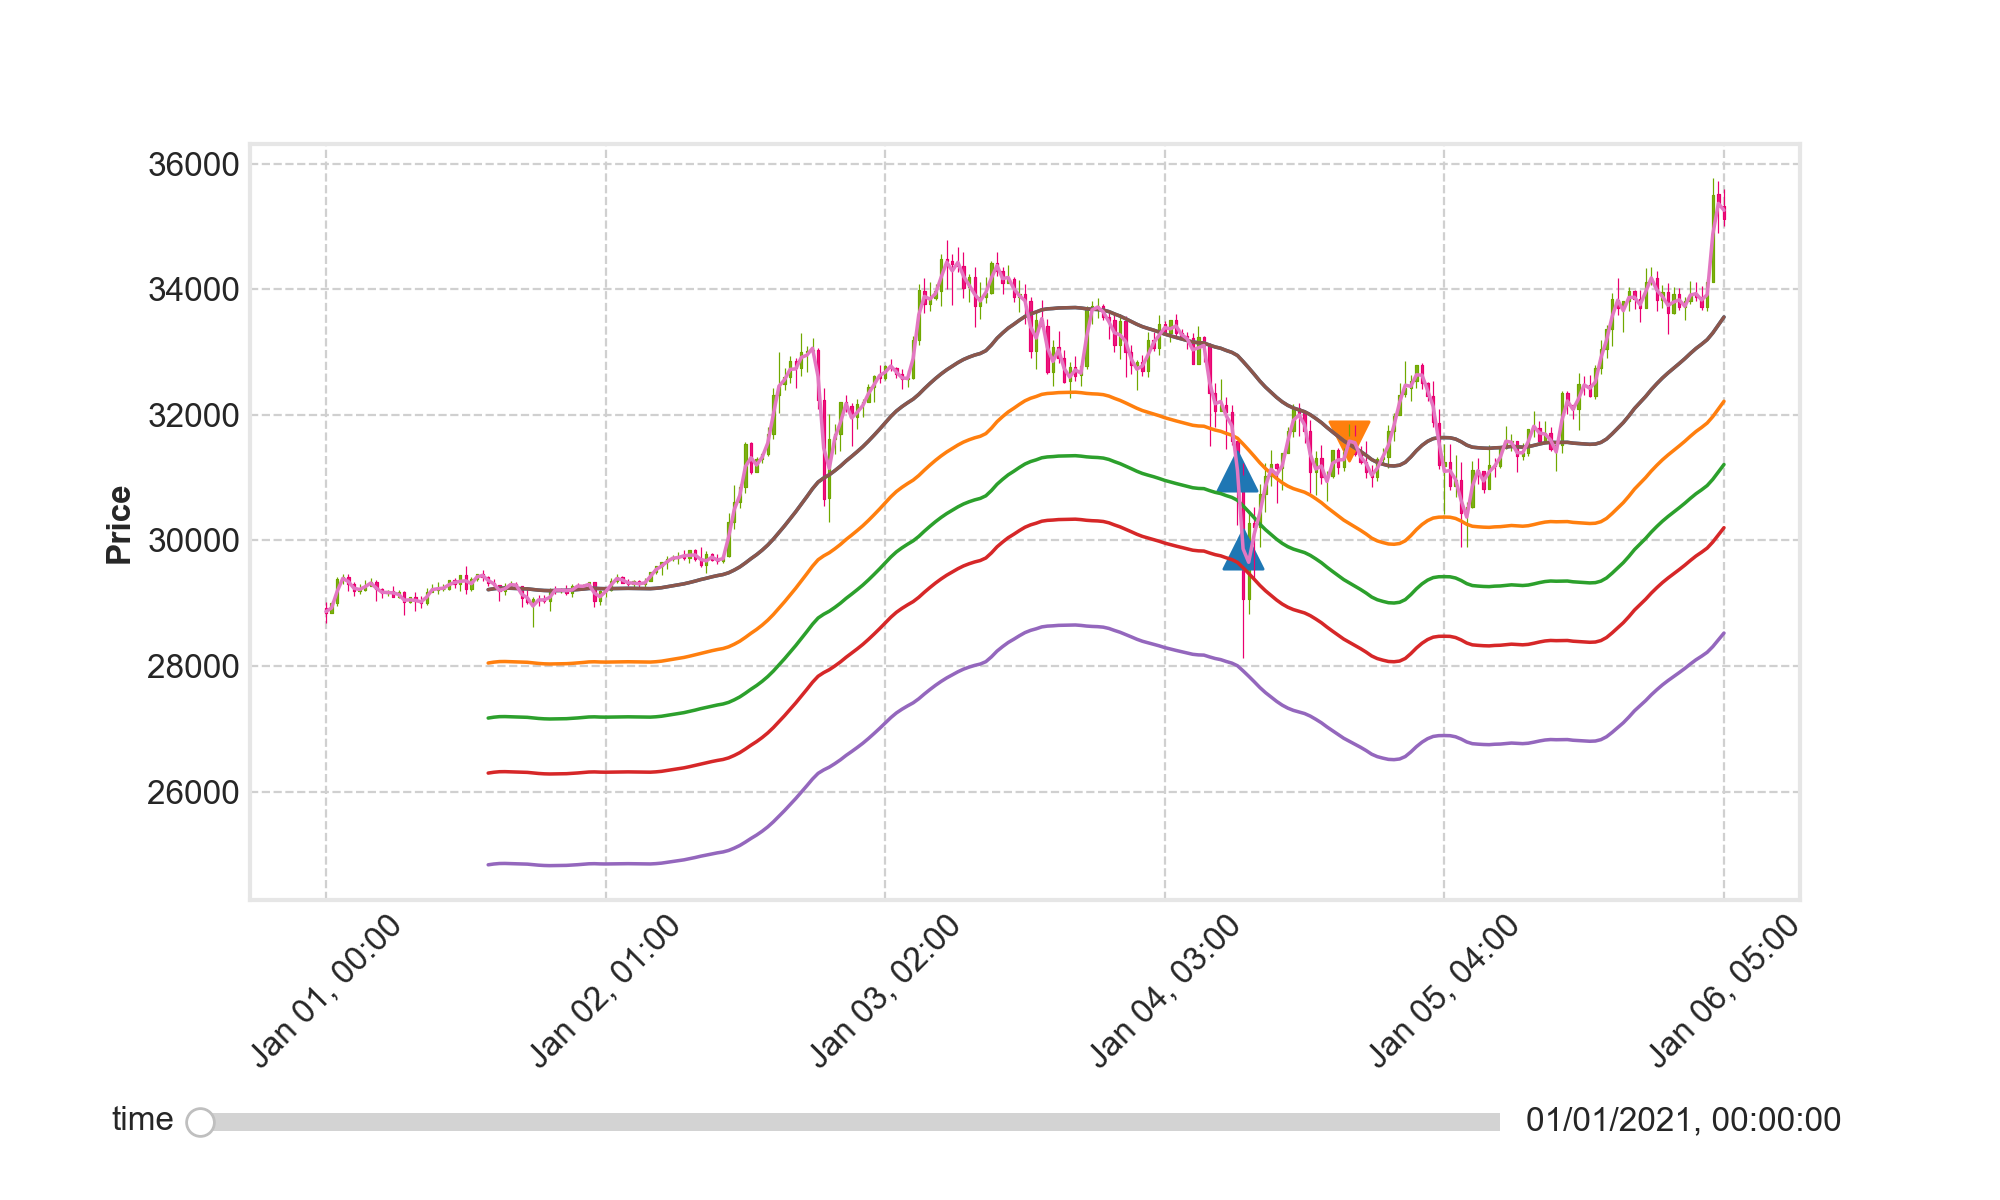

0

In [9]:
# https://stackoverflow.com/questions/31015755/datetime-with-slider-widget-in-matplotlib
# https://stackoverflow.com/questions/71164033/date-tick-marks-mm-dd-on-slider
from matplotlib.widgets import Slider
import matplotlib

n_points = 250

time_min_index = 0
time_max_index = n_points
time_min = ohlc.index[time_min_index]
time_max = ohlc.index[time_max_index]
time_delta = time_max - time_min

# create figure
fig = mpf.figure(style='binance', figsize=(10, 6))
ax = fig.add_subplot(1,1,1)
plt.subplots_adjust(bottom=0.25) # add space for slider

# create slider
slider_ax = plt.axes([0.1, 0.05, 0.65, 0.03])
slider_max = len(ohlc.index) - n_points - 1
time_slider = Slider(slider_ax, 'time', matplotlib.dates.date2num(time_min),
                     matplotlib.dates.date2num(ohlc.index[slider_max]))

# update figure based on slider value
def update(min_pos):
    time_min = matplotlib.dates.num2date(min_pos)
    time_max = matplotlib.dates.num2date(min_pos) + time_delta
    plot_data_points(ax, time_min, time_max)
    time_slider.valtext.set_text(time_min.strftime("%m/%d/%Y, %H:%M:%S"))
    fig.canvas.draw_idle()

# init time slider
update(matplotlib.dates.date2num(time_min))
time_slider.on_changed(update)